# NLP

In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(25000,) (25000,)
(25000,) (25000,)


In [3]:
train_input

array([list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 21, 

In [4]:
train_target

array([1, 0, 0, ..., 0, 1, 0])

In [5]:
# train_input의 각각은 파이썬 리스트 객체로 하나하나가 리뷰이며 그 단어들을 숫자로 바꿔서 표현해둔것임
print(len(train_input[0]))

218


In [6]:
# 두번째 리뷰 길이
print(len(train_input[1]))

189


In [7]:
# 우리가 num_words = 500이라고 설정했기때문에 어휘 사전에 없는 단어는 모두 2로 표현되어서 나타난다.
# target의 0은 부정적인 리뷰, 1은 긍정적인 리뷰를 상징한다.
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [8]:
# val data 떼두기
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [9]:
# 평균적인 리뷰의 길이와 가장 긴 리뷰의 길이를 확인하자
import numpy as np
lengths = np.array([len(x) for x in train_input])

print(np.mean(lengths), np.median(lengths))

239.00925 178.0


리뷰의 평균 단어 수는 239개이며 중간값이 178개이다.

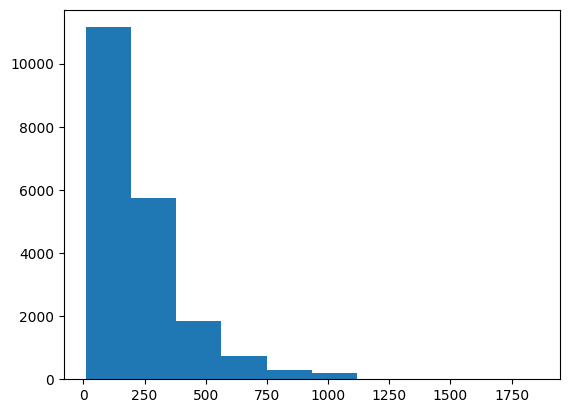

In [10]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.show()

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100) # 100개 미만의 리뷰만 뽑아온다. padding도 해준다. 100보다 길면 짜름
val_seq = pad_sequences(val_input, maxlen=100)

In [12]:
print(train_seq.shape)

(20000, 100)


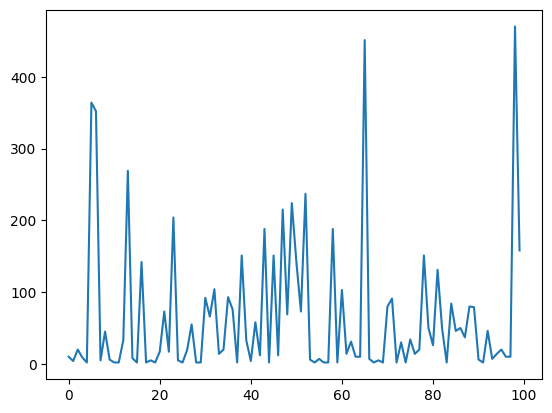

In [13]:
plt.plot(train_seq[0][:])
plt.show() # 일종의 시계열(순차) 데이터임

In [14]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500))) # input data에 단어를 500개만 사용 ~ 원 핫 코딩으로 바꾼거임
model.add(keras.layers.Dense(1, activation='sigmoid')) # 샘플 수가 2만개임 헷갈리지 말기~

In [15]:
train_oh = keras.utils.to_categorical(train_seq)
train_oh.shape

(20000, 100, 500)

In [16]:
print(train_oh[0][0][:12]) # 성공적으로 변환됨

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [17]:
val_oh = keras.utils.to_categorical(val_seq)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [19]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [20]:
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 31s 93ms/step - loss: 0.6944 - accuracy: 0.5219 - val_loss: 0.6853 - val_accuracy: 0.5562
Epoch 2/100
313/313 [==============================] - 19s 61ms/step - loss: 0.6724 - accuracy: 0.5883 - val_loss: 0.6637 - val_accuracy: 0.6074
Epoch 3/100
313/313 [==============================] - 19s 61ms/step - loss: 0.6517 - accuracy: 0.6299 - val_loss: 0.6447 - val_accuracy: 0.6400
Epoch 4/100
313/313 [==============================] - 19s 60ms/step - loss: 0.6310 - accuracy: 0.6675 - val_loss: 0.6247 - val_accuracy: 0.6770
Epoch 5/100
313/313 [==============================] - 20s 63ms/step - loss: 0.6060 - accuracy: 0.7048 - val_loss: 0.6018 - val_accuracy: 0.7086
Epoch 6/100
313/313 [==============================] - 19s 60ms/step - loss: 0.5874 - accuracy: 0.7260 - val_loss: 0.5860 - val_accuracy: 0.7190
Epoch 7/100
313/313 [==============================] - 18s 58ms/step - loss: 0.5729 - accuracy: 0.7363 - val_loss: 0.5723 - val_ac